In [85]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

from sklearn import metrics
from sklearn.model_selection import train_test_split

# Preprocessing
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, PolynomialFeatures

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

from imblearn.pipeline import Pipeline , make_pipeline
from sklearn.compose import ColumnTransformer

# Model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Metric
from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, classification_report, f1_score, make_scorer, fbeta_score
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve, precision_recall_curve, average_precision_score, plot_precision_recall_curve
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import cross_validate

from scipy.stats import kruskal, mannwhitneyu

import warnings
warnings.filterwarnings('ignore')

## BUSSINESS PROBLEM


-Target :

1 = Claim Travel Insurance

0 = Tidak Claim Travel Insurance

-Problem Statement : 
Dari perusahaan Travel Insurance tersebut ingin tau seberapa besar pendapatan bersih dari travel insurance tsb dan seberapa besar pendapatan yang harus didapatkan tetapi gagal untuk di dapat , disebabkan oleh tidak ada approach dari pihak perusahaan ke customer tsb .

-Goals :
Maka berdasarkan pada permasalahan tersebut,Perusahaan ingin mempunyai kemampuan untuk memprediksi calon nasabah yang akan claim / tidak claim . yang nantinya hasil dari machine learning ini bisa membantu perusahaan untuk mengambil keputusan terhadap calon nasabah. 




-Analytic Approach :
Jadi yang akan saya lakukan adalah menganalisa data dan mengukur/memprediksi menggunakan machine learning untuk memprediksi seberapa besar pendapatan bersih pada perusahaan tsb.




 -Metric Evaluation


- FP -> Machine learning memprediksi Claim , tetapi nyatanya tidak Claim akan berdampak perusahaan kehilangan opportunity / calon customer bila tidak di approach.
- FN -> Machine learning memprediksi tidak Claim , tetapi nyatanya Claim akan berdampak kerugian pada perusahaan karena harus mengeluarkan dana untuk claim travel insurance pada customer tsb.

Karena keduanya sama penting 

## Data Understanding

Travel Insurance

Context
Travel insurance is a type of insurance that provides protection as long as we travel both
domestically and abroad. Several countries have even required travelers to have travel
insurance, for example, countries in Europe and America. The amount of premium depends on
the coverage desired, the length of the trip, and the purpose of the trip. A company engaged in
travel insurance wants to know the policyholder who will submit an insurance claim for
coverage. Policyholder data at insurance companies is historical data consisting of destinations,
insurance products, and so on.

Note 
- Dataset tsb sangat tidak seimbang
- Sebagaian dalam dalam data terdapat kategori (Nominal , Ordinary , Binary)
- Sebagian data dalam kolom 'Gender' terdapat 'Missing Value' atau Unknown Gender.


 Attribute Information

- Agency: Name of agency.
- Agency Type: Type of travel insurance agencies.
- Distribution Channel: Channel of travel insurance agencies.
- Product Name: Name of the travel insurance products.
- Gender: Gender of insured.
- Duration: Duration of travel.
- Destination: Destination of travel.
- Net Sales: Amount of sales of travel insurance policies.
- Commission (in value): Commission received for travel insurance agency.
- Age: Age of insured.
- Claim: Claim status.

In [86]:
df = pd.read_csv("data_travel_insurance.csv")
df

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.00,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.00,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.70,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.00,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.00,28,No
...,...,...,...,...,...,...,...,...,...,...,...
44323,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,14,CHINA,30.0,0.00,36,Yes
44324,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,NaN,17,AUSTRALIA,79.2,47.52,47,No
44325,TST,Travel Agency,Offline,Travel Cruise Protect,M,64,THAILAND,30.0,10.50,50,No
44326,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,51,CHINA,36.0,0.00,36,No


In [87]:
df['Product Name'].value_counts()

Cancellation Plan                       12979
2 way Comprehensive Plan                 9341
Rental Vehicle Excess Insurance          5980
Basic Plan                               3834
Bronze Plan                              2847
1 way Comprehensive Plan                 2336
Value Plan                               1907
Silver Plan                              1552
Annual Silver Plan                        975
Ticket Protector                          765
Travel Cruise Protect                     353
Comprehensive Plan                        253
Gold Plan                                 237
24 Protect                                172
Annual Gold Plan                          142
Single Trip Travel Protect Gold           135
Premier Plan                              130
Single Trip Travel Protect Silver         117
Annual Travel Protect Gold                 63
Annual Travel Protect Silver               59
Individual Comprehensive Plan              48
Single Trip Travel Protect Platinu

## Data Cleaning

terdapat beberapa data kosong di dalam database tsb  dan terdapat beberapa data duplikat di dalam database tsb .

sebagai info data duplikat biasanya mempunyai kesamaan data per kolom di dalam database.

In [88]:
df.duplicated().sum()

4667

untuk step ini saya menghapus data yang duplikat di dalam database tsb.


In [89]:
df.drop_duplicates()

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.00,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.00,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.70,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.00,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.00,28,No
...,...,...,...,...,...,...,...,...,...,...,...
44323,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,14,CHINA,30.0,0.00,36,Yes
44324,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,NaN,17,AUSTRALIA,79.2,47.52,47,No
44325,TST,Travel Agency,Offline,Travel Cruise Protect,M,64,THAILAND,30.0,10.50,50,No
44326,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,51,CHINA,36.0,0.00,36,No


In [90]:
df.groupby('Claim').mean()

,Duration,Net Sales,Commision (in value),Age
Claim,,,,
No,48.534902,39.728734,9.456274,39.94676
Yes,106.769572,93.564934,25.918375,38.56130


Mari kita cek untuk Database bagian 'Gender' , dapat diliat secara langsung kolom gender terdapat unique code ( 'F' , 'nan' , 'M' )

In [91]:
df['Gender'].unique()

array(['F', nan, 'M'], dtype=object)

In [92]:
df.isna().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Gender                  31647
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Age                         0
Claim                       0
dtype: int64

- Terdapat missing value pada kolom Gender
- missing value yang terdapat di column gender 71% .

Terdapat data kosong pada kolom Gender , sehingga diisi dengan 'Not Specified'

In [93]:
df.fillna('Not Specified',inplace=True)


In [94]:
df.isna().sum()

Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Gender                  0
Duration                0
Destination             0
Net Sales               0
Commision (in value)    0
Age                     0
Claim                   0
dtype: int64

Untuk selanjutnya mari kita cek kolom 'Duration' , dapat diliat di kolom Duration terdapat data negatif .

In [95]:
df['Duration'].describe()


count    44328.000000
mean        49.424292
std        109.153961
min         -1.000000
25%          9.000000
50%         22.000000
75%         53.000000
max       4881.000000
Name: Duration, dtype: float64

Mengisi 'Duration' yg minus dengan 'Mean'/Rata-rata dari 'Duration'

In [96]:
df.loc[df['Duration'] < 0, 'Duration'] = 49.317

In [97]:
df[df['Duration'] < 0 ]

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim


Untuk step selanjutnya saya mengecek di kolom 'Net Sales' , terdapat data yang tidak logis dan data yang bernilai negatif.


In [98]:
df['Net Sales'].describe()

count    44328.000000
mean        40.550948
std         48.661970
min       -357.500000
25%         18.000000
50%         26.500000
75%         48.000000
max        810.000000
Name: Net Sales, dtype: float64

mengecek tabel net sales & commision , net sales normalnya tidak bisa lebih kecil dari commision.

In [99]:
df[df['Net Sales']<df['Commision (in value)']]

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
45,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,Not Specified,24.0,UNITED ARAB EMIRATES,0.00,23.76,27,No
60,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,Not Specified,14.0,AUSTRALIA,0.00,17.82,31,No
75,C2B,Airlines,Online,Silver Plan,F,23.0,SINGAPORE,0.00,5.63,25,No
94,C2B,Airlines,Online,Annual Silver Plan,M,365.0,SINGAPORE,-216.75,54.19,36,No
116,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,Not Specified,430.0,AUSTRALIA,-59.40,35.64,41,No
...,...,...,...,...,...,...,...,...,...,...,...
44168,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,Not Specified,13.0,CANADA,0.00,41.58,31,No
44187,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,Not Specified,5.0,MALAYSIA,0.00,17.82,31,No
44213,CCR,Travel Agency,Offline,Comprehensive Plan,M,56.0,THAILAND,0.00,9.57,20,No
44268,JZI,Airlines,Online,Basic Plan,M,8.0,HONG KONG,0.00,12.25,69,No


In [100]:
# df2 = df['Net Sales']<df['Commision (in value)']
# df2.sum()

- mengubah data net sales yg  < 0 dan comission menjadi 0.
- mengubah Net Sales yg minus menjadi 0

In [101]:
df.loc[df['Net Sales'] < 0 , 'Net Sales'] = 0

In [102]:
df.loc[df['Net Sales'] == 0 , 'Commision (in value)'] = 0

In [103]:
df[df['Net Sales']<df['Commision (in value)']]

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim


In [104]:
df[df['Net Sales'] == 0]

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
45,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,Not Specified,24.0,UNITED ARAB EMIRATES,0.0,0.0,27,No
60,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,Not Specified,14.0,AUSTRALIA,0.0,0.0,31,No
63,EPX,Travel Agency,Online,Cancellation Plan,Not Specified,100.0,UNITED STATES,0.0,0.0,37,No
75,C2B,Airlines,Online,Silver Plan,F,23.0,SINGAPORE,0.0,0.0,25,No
78,EPX,Travel Agency,Online,Cancellation Plan,Not Specified,73.0,BELGIUM,0.0,0.0,36,No
...,...,...,...,...,...,...,...,...,...,...,...
44207,EPX,Travel Agency,Online,2 way Comprehensive Plan,Not Specified,152.0,UNITED STATES,0.0,0.0,49,No
44213,CCR,Travel Agency,Offline,Comprehensive Plan,M,56.0,THAILAND,0.0,0.0,20,No
44268,JZI,Airlines,Online,Basic Plan,M,8.0,HONG KONG,0.0,0.0,69,No
44273,EPX,Travel Agency,Online,Cancellation Plan,Not Specified,52.0,PHILIPPINES,0.0,0.0,36,No


In [105]:
df['Net Sales'].describe()

count    44328.000000
mean        41.205293
std         47.402393
min          0.000000
25%         18.000000
50%         26.500000
75%         48.000000
max        810.000000
Name: Net Sales, dtype: float64

Berikut di bawah ini terdapat banyak jenis country dari berbagai negara , untuk lebih jelas bisa diliat secara visualisasi di bawah ini , tetapi sbelumnya kita mengkelompokan menjadi 15 negara terbaik/tertinggi dan sisanya dikelompokan menjadi 'Other Countries'

Di bawah ini dapat diliat 'Singapore','Malaysia','Thailand' menjadi target pasar utama untuk perusahaan tersebut .

In [106]:
destination_data = pd.DataFrame(df['Destination'].value_counts().reset_index().rename(columns={'index':'country'}))
destination_data

,country,Destination
0,SINGAPORE,9267
1,MALAYSIA,4139
2,THAILAND,4122
3,CHINA,3396
4,AUSTRALIA,2578
...,...,...
133,JAMAICA,1
134,ANGOLA,1
135,FRENCH POLYNESIA,1
136,NIGERIA,1


In [107]:
list_country = (destination_data.iloc[15:]['country']).tolist()
list_country

['MYANMAR',
 'BRUNEI DARUSSALAM',
 'NEW ZEALAND',
 'CANADA',
 'CAMBODIA',
 'FRANCE',
 'ITALY',
 'GERMANY',
 'NETHERLANDS',
 'SPAIN',
 'SWITZERLAND',
 'UNITED ARAB EMIRATES',
 'SRI LANKA',
 'NORWAY',
 'SOUTH AFRICA',
 "LAO PEOPLE'S DEMOCRATIC REPUBLIC",
 'IRELAND',
 'ICELAND',
 'MACAO',
 'NEPAL',
 'GREECE',
 'BANGLADESH',
 'AUSTRIA',
 'DENMARK',
 'PORTUGAL',
 'PERU',
 'FINLAND',
 'TURKEY',
 'RUSSIAN FEDERATION',
 'SWEDEN',
 'CROATIA',
 'CZECH REPUBLIC',
 'SAUDI ARABIA',
 'ISRAEL',
 'MONGOLIA',
 'BELGIUM',
 'POLAND',
 'BRAZIL',
 'MEXICO',
 'PAKISTAN',
 'MALDIVES',
 'TANZANIA, UNITED REPUBLIC OF',
 'KENYA',
 'OMAN',
 'KAZAKHSTAN',
 'ARGENTINA',
 'HUNGARY',
 'COLOMBIA',
 'QATAR',
 'MOROCCO',
 'JORDAN',
 'CYPRUS',
 'GEORGIA',
 'EGYPT',
 'PAPUA NEW GUINEA',
 'BAHRAIN',
 'UKRAINE',
 'FIJI',
 'MAURITIUS',
 'ROMANIA',
 'CHILE',
 'MALTA',
 'UZBEKISTAN',
 'ECUADOR',
 'BULGARIA',
 'TUNISIA',
 'ESTONIA',
 'BOLIVIA',
 'AZERBAIJAN',
 'SERBIA',
 'LUXEMBOURG',
 'SLOVENIA',
 'LEBANON',
 'KUWAIT',
 'BHUT

In [108]:
df['Destination'] = df['Destination'].replace(list_country,'OTHERS')


In [275]:
pie = df['Destination'].value_counts()

Visualisasi


In [111]:
df['Agency Type'].value_counts()

Travel Agency    32113
Airlines         12215
Name: Agency Type, dtype: int64

## OUTLIERS

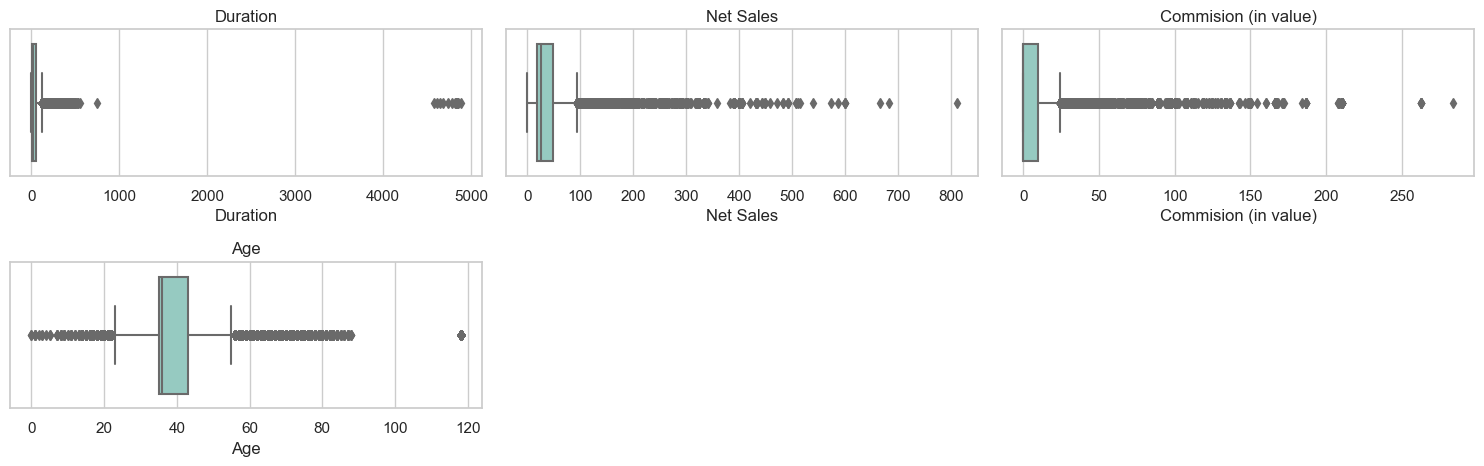

In [112]:
# Numerical Features
num_feature = [fea for fea in df.describe().columns]
num_feature

plt.figure(figsize=(15, 9), facecolor='white')
sns.set(style='whitegrid', palette='Set3')
plotnumber = 1
    
for feature in num_feature:
    ax = plt.subplot(4,3, plotnumber)
    sns.boxplot(x=feature, data=df);
    plt.title(feature, fontsize=12)
    plt.tight_layout()
    plotnumber += 1

Menghapus outliers Duration yang lebih dari 4000 , karena sangat jauh dari kumpulan data yg lain / termasuk ( Extreme Outliers )

In [113]:
duration_4000 = df[df['Duration'] > 4000].index
duration_4000

Int64Index([   87,  4678, 10172, 12140, 19497, 20038, 22215, 25606, 28032,
            37207, 38536, 42584, 42717],
           dtype='int64')

In [114]:
df.drop(duration_4000,inplace=True)

In [115]:
df[df['Duration'] == 0]

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
242,JZI,Airlines,Online,Basic Plan,M,0.0,CHINA,22.00,7.70,34,No
1782,SSI,Airlines,Online,Ticket Protector,Not Specified,0.0,SINGAPORE,1.80,0.50,48,No
1853,JWT,Airlines,Online,Value Plan,M,0.0,INDIA,62.00,24.80,118,No
2558,SSI,Airlines,Online,Ticket Protector,Not Specified,0.0,SINGAPORE,9.77,2.74,48,No
3236,LWC,Travel Agency,Online,Single Trip Travel Protect Gold,F,0.0,INDIA,35.25,22.91,24,No
3406,SSI,Airlines,Online,Ticket Protector,Not Specified,0.0,SINGAPORE,2.86,0.80,48,No
3549,JZI,Airlines,Online,Basic Plan,M,0.0,VIET NAM,18.00,6.30,58,No
3591,JZI,Airlines,Online,Basic Plan,F,0.0,OTHERS,18.00,6.30,26,No
3753,JWT,Airlines,Online,Value Plan,M,0.0,INDIA,31.00,12.40,118,No
4939,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,Not Specified,0.0,UNITED STATES,9.90,5.94,59,No


Di atas ini dapat diliat data 'Duration' sangat tidak logis karena bernilai 0 ,sehingga saya drop untuk data tsb.

In [116]:
df[df['Duration'] == 0].__len__()


47

In [117]:
drop_duration = df[df['Duration'] == 0].index
df.drop(drop_duration,inplace=True)



In [118]:
df[df['Duration'] == 0].count()

Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Gender                  0
Duration                0
Destination             0
Net Sales               0
Commision (in value)    0
Age                     0
Claim                   0
dtype: int64

total data duration yg 0 terdapat 29 ,sudah di drop

( Drop Outliers )
Terdapat outliers / data umur yang lebih dari 100 .
secara normal manusia hanya sampai umur 100 , sehingga saya drop data 'Age' yang lebih dari 100 .


In [119]:
umur_100 = df[df['Age'] > 100].index
umur_100

Int64Index([   99,   105,   363,   373,   727,   770,   873,   911,  1130,
             1246,
            ...
            43667, 43838, 43846, 43856, 43928, 43985, 44089, 44140, 44150,
            44219],
           dtype='int64', length=658)

In [120]:
df.drop(umur_100, inplace=True)

In [121]:
df[df['Age'] > 100] & df[df['Duration'] > 4000]

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim


Data/Outliers tsb sudah di Drop

## DATA VISUALISASI

- Visualisasi perbandingan data claim dan tidak claim .
data terliat sangat tidak balance karena persentasi tidak claim lebih tinggi dibanding claim.

<AxesSubplot:xlabel='Claim', ylabel='count'>

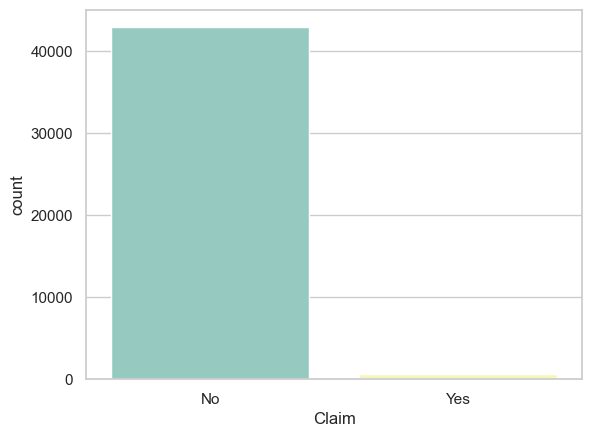

In [122]:
sns.countplot(data = df , x = df['Claim'])

In [123]:
df['Claim'] = np.where(df['Claim'] == 'Yes' , 1 ,0)

In [293]:
destination_data_head = destination_data.head(15)
destination_data_head

,country,Destination
0,SINGAPORE,9229
1,OTHERS,6253
2,MALAYSIA,4114
3,THAILAND,4092
4,CHINA,3379
5,AUSTRALIA,2577
6,INDONESIA,2371
7,PHILIPPINES,1750
8,UNITED STATES,1738
9,HONG KONG,1733


Text(0.5, 1.0, 'Maximun number of claims per Destination')

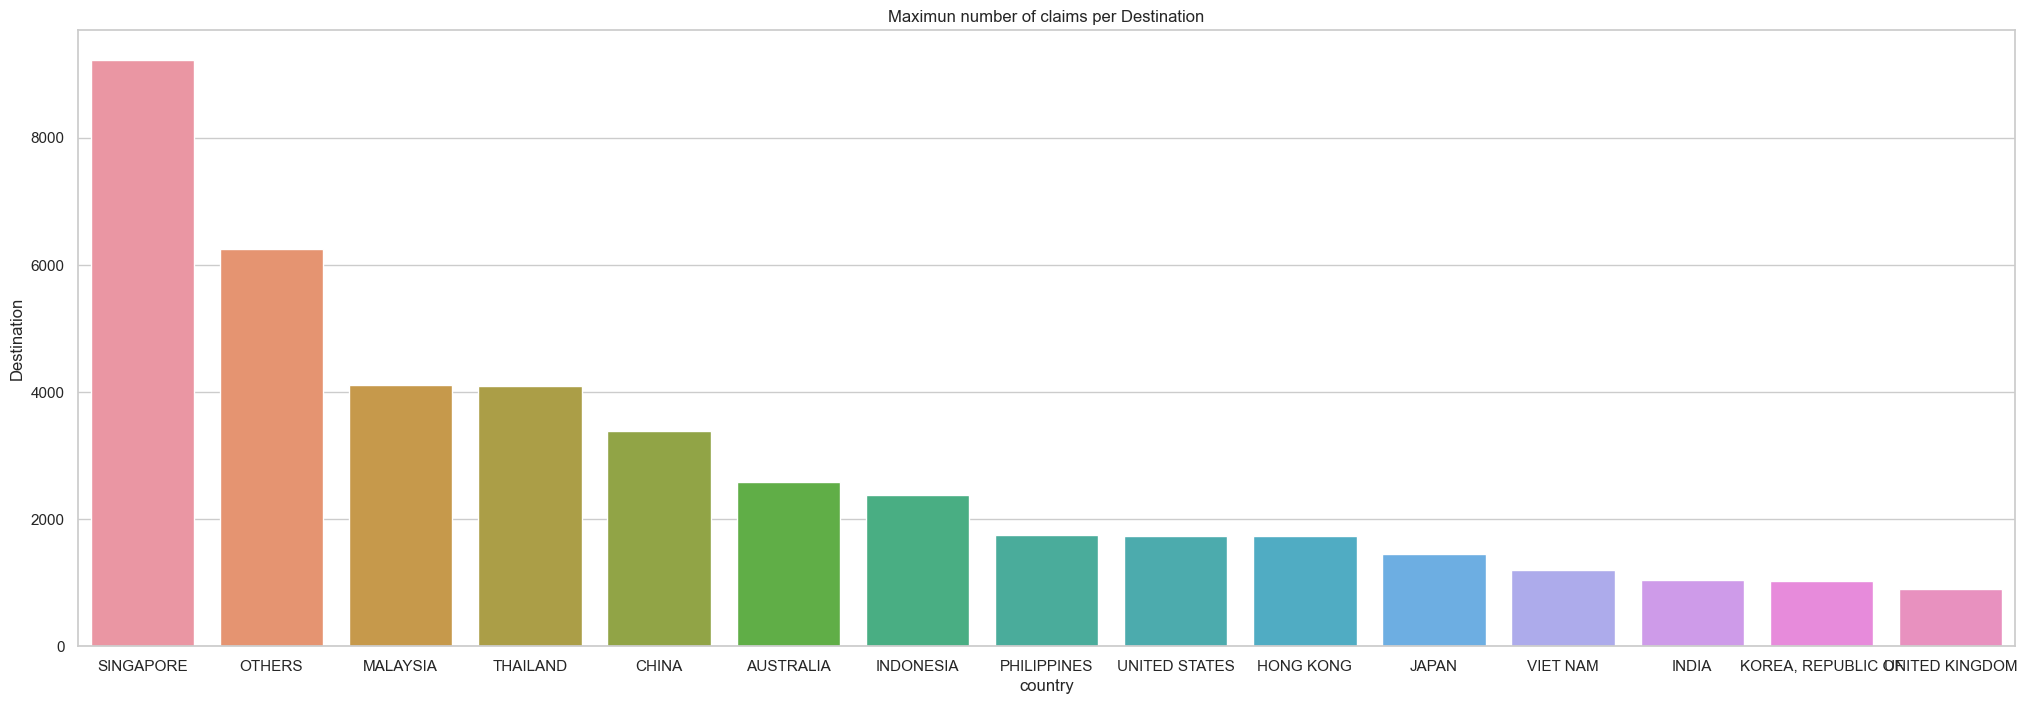

In [295]:
plt.figure(figsize=[25,8])
sns.barplot(x = destination_data_head['country'] , y=destination_data_head['Destination'])
plt.title('Maximun number of claims per Destination')

In [296]:
most_product = df.value_counts('Product Name').head(10)
most_product

Product Name
Cancellation Plan                  12977
2 way Comprehensive Plan            9317
Rental Vehicle Excess Insurance     5977
Basic Plan                          3786
Bronze Plan                         2844
1 way Comprehensive Plan            2333
Silver Plan                         1552
Value Plan                          1338
Annual Silver Plan                   975
Ticket Protector                     731
dtype: int64

Text(0.5, 1.0, 'Maximum Products Sold')

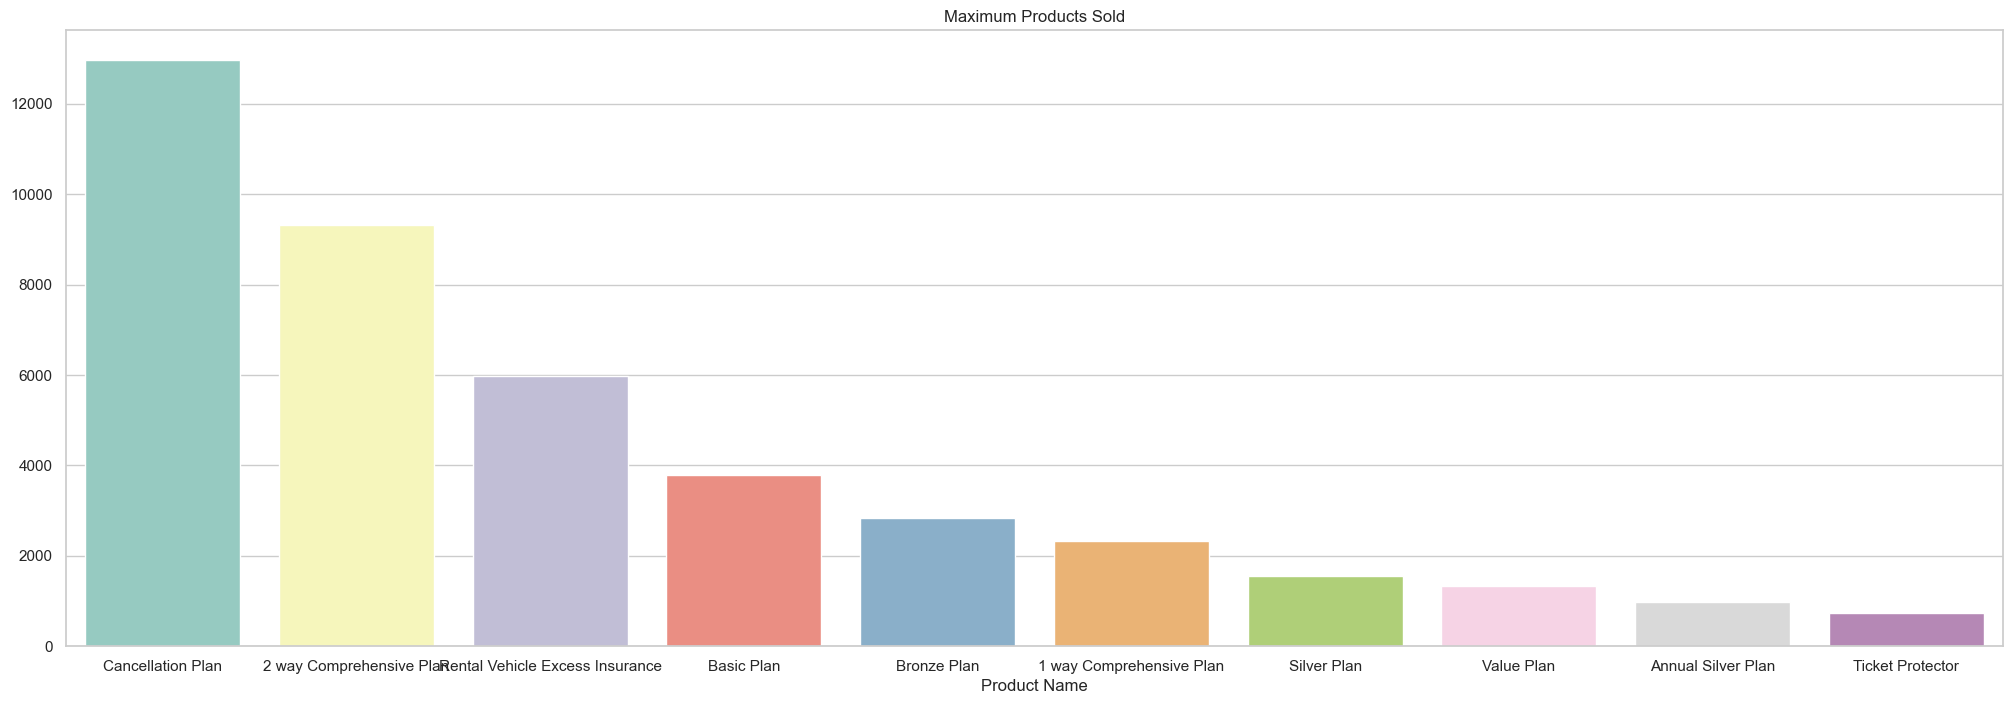

In [297]:
plt.figure(figsize=[25,8])
sns.barplot(most_product.index,most_product)
plt.title('Maximum Products Sold')

Mengecek apakah umur yg lebih tua menjadi sebuah parameter untuk mempengaruhi claim insurance?

In [298]:
age_claim = df.groupby('Age')[['Claim']].sum().sort_values(by=['Claim'], ascending = False).head(10)
age_claim

,Claim
Age,
36,115
30,36
31,35
28,34
35,24
26,24
32,23
34,20
29,20


Text(0.5, 1.0, 'Most Age with Claims')

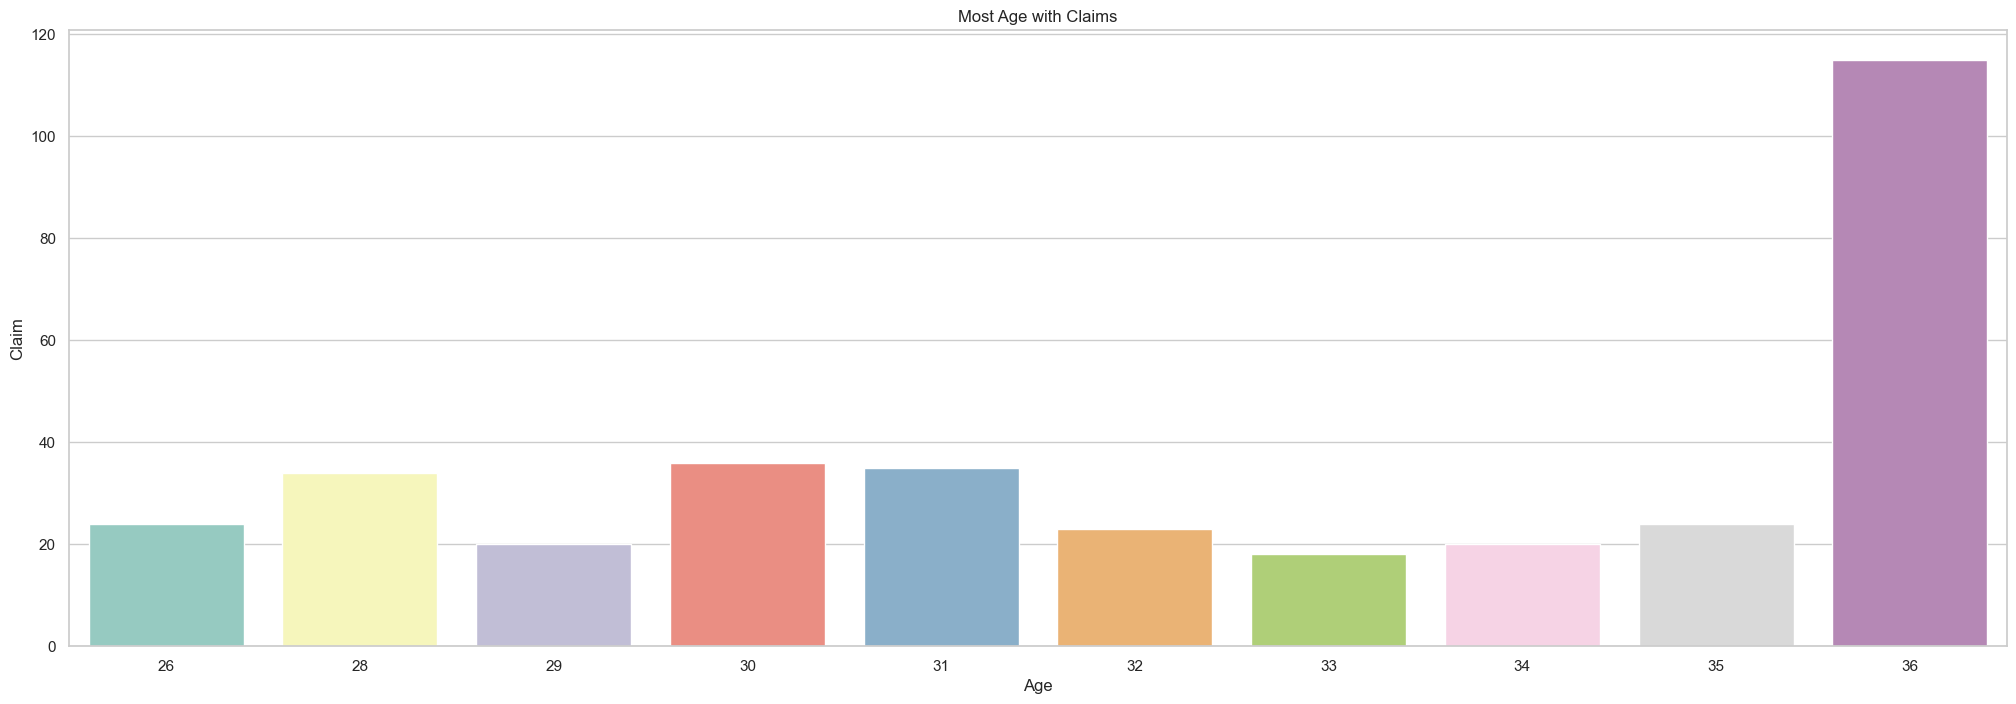

In [314]:
plt.figure(figsize=[25,8])
sns.barplot(age_claim.index,age_claim['Claim'])
plt.title('Most Age with Claims')

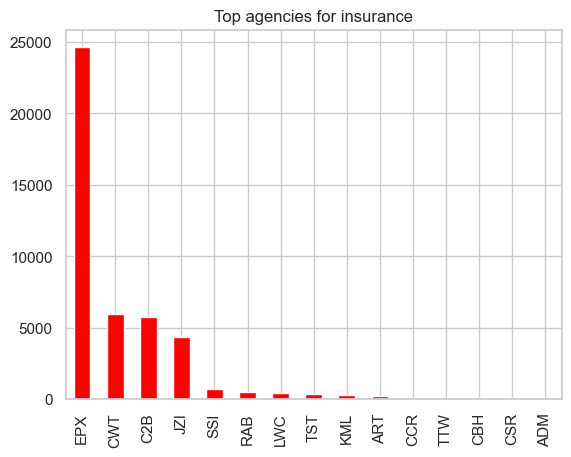

In [304]:
df['Agency'].value_counts().plot(kind='bar',color='red')
plt.title('Top agencies for insurance')
plt.show()

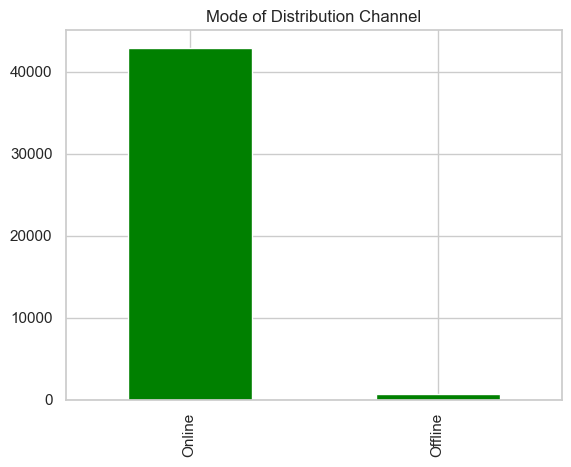

In [302]:
df['Distribution Channel'].value_counts().plot(kind='bar',color='green')
plt.title("Mode of Distribution Channel")
plt.show()

## Data Splitting

In [124]:
df

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365.0,SINGAPORE,216.0,54.00,57,0
1,EPX,Travel Agency,Online,Cancellation Plan,Not Specified,4.0,MALAYSIA,10.0,0.00,33,0
2,JZI,Airlines,Online,Basic Plan,M,19.0,INDIA,22.0,7.70,26,0
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,Not Specified,20.0,UNITED STATES,112.0,0.00,59,0
4,C2B,Airlines,Online,Bronze Plan,M,8.0,SINGAPORE,16.0,4.00,28,0
...,...,...,...,...,...,...,...,...,...,...,...
44323,EPX,Travel Agency,Online,2 way Comprehensive Plan,Not Specified,14.0,CHINA,30.0,0.00,36,1
44324,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,Not Specified,17.0,AUSTRALIA,79.2,47.52,47,0
44325,TST,Travel Agency,Offline,Travel Cruise Protect,M,64.0,THAILAND,30.0,10.50,50,0
44326,EPX,Travel Agency,Online,2 way Comprehensive Plan,Not Specified,51.0,CHINA,36.0,0.00,36,0


In [125]:
X = df.drop(columns=['Claim'])
y = df['Claim']

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [127]:
y.value_counts() / len(X)*100

0    98.463655
1     1.536345
Name: Claim, dtype: float64

## Data Preprocessing

In [128]:
df

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365.0,SINGAPORE,216.0,54.00,57,0
1,EPX,Travel Agency,Online,Cancellation Plan,Not Specified,4.0,MALAYSIA,10.0,0.00,33,0
2,JZI,Airlines,Online,Basic Plan,M,19.0,INDIA,22.0,7.70,26,0
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,Not Specified,20.0,UNITED STATES,112.0,0.00,59,0
4,C2B,Airlines,Online,Bronze Plan,M,8.0,SINGAPORE,16.0,4.00,28,0
...,...,...,...,...,...,...,...,...,...,...,...
44323,EPX,Travel Agency,Online,2 way Comprehensive Plan,Not Specified,14.0,CHINA,30.0,0.00,36,1
44324,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,Not Specified,17.0,AUSTRALIA,79.2,47.52,47,0
44325,TST,Travel Agency,Offline,Travel Cruise Protect,M,64.0,THAILAND,30.0,10.50,50,0
44326,EPX,Travel Agency,Online,2 way Comprehensive Plan,Not Specified,51.0,CHINA,36.0,0.00,36,0


In [129]:
feat_cat = list(df.describe(include='object'))
feat_cat

['Agency',
 'Agency Type',
 'Distribution Channel',
 'Product Name',
 'Gender',
 'Destination']

In [130]:
feat_num = list(df.describe())
feat_num

['Duration', 'Net Sales', 'Commision (in value)', 'Age', 'Claim']

In [131]:
df

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365.0,SINGAPORE,216.0,54.00,57,0
1,EPX,Travel Agency,Online,Cancellation Plan,Not Specified,4.0,MALAYSIA,10.0,0.00,33,0
2,JZI,Airlines,Online,Basic Plan,M,19.0,INDIA,22.0,7.70,26,0
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,Not Specified,20.0,UNITED STATES,112.0,0.00,59,0
4,C2B,Airlines,Online,Bronze Plan,M,8.0,SINGAPORE,16.0,4.00,28,0
...,...,...,...,...,...,...,...,...,...,...,...
44323,EPX,Travel Agency,Online,2 way Comprehensive Plan,Not Specified,14.0,CHINA,30.0,0.00,36,1
44324,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,Not Specified,17.0,AUSTRALIA,79.2,47.52,47,0
44325,TST,Travel Agency,Offline,Travel Cruise Protect,M,64.0,THAILAND,30.0,10.50,50,0
44326,EPX,Travel Agency,Online,2 way Comprehensive Plan,Not Specified,51.0,CHINA,36.0,0.00,36,0


Sekarang mari kita lihat untuk fitur" encoder yang ada di bawah ini tersebut .

1 . Merubah fitur/kolom pada ['Agency','Agency Type','Distribution Channel','Product Name','Gender','Destination'] menggunakan 'One Hot Encoding' Karena fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.

2 . Merubah fitur/kolom pada ['Duration', 'Net Sales', 'Commision (in value)', 'Age'] Karena di scaling median dijadiin 0 , alasan saya memilih Robust Scaler karena central tendency nya sesuai pada data distribusi tsb.

In [132]:
transformer = ColumnTransformer([
    ('Scaler',RobustScaler(),['Duration', 'Net Sales', 'Commision (in value)', 'Age']),
    ('onehot' , OneHotEncoder(drop='first',handle_unknown='ignore'),['Agency','Agency Type','Distribution Channel','Product Name','Gender','Destination'])]
, remainder='passthrough')



transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('Scaler', RobustScaler(),
                                 ['Duration', 'Net Sales',
                                  'Commision (in value)', 'Age']),
                                ('onehot',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 ['Agency', 'Agency Type',
                                  'Distribution Channel', 'Product Name',
                                  'Gender', 'Destination'])])

In [133]:
# from sklearn import linear_model

## Modeling & Evaluation

In [134]:
logreg = LogisticRegression(solver='liblinear', random_state=0)
knn = KNeighborsClassifier(n_neighbors=5)
tree = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, max_depth=5, random_state=0)

rf = RandomForestClassifier(random_state=0)
adaboost = AdaBoostClassifier(random_state=0)
gboost = GradientBoostingClassifier(random_state=0)


In [135]:
df

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365.0,SINGAPORE,216.0,54.00,57,0
1,EPX,Travel Agency,Online,Cancellation Plan,Not Specified,4.0,MALAYSIA,10.0,0.00,33,0
2,JZI,Airlines,Online,Basic Plan,M,19.0,INDIA,22.0,7.70,26,0
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,Not Specified,20.0,UNITED STATES,112.0,0.00,59,0
4,C2B,Airlines,Online,Bronze Plan,M,8.0,SINGAPORE,16.0,4.00,28,0
...,...,...,...,...,...,...,...,...,...,...,...
44323,EPX,Travel Agency,Online,2 way Comprehensive Plan,Not Specified,14.0,CHINA,30.0,0.00,36,1
44324,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,Not Specified,17.0,AUSTRALIA,79.2,47.52,47,0
44325,TST,Travel Agency,Offline,Travel Cruise Protect,M,64.0,THAILAND,30.0,10.50,50,0
44326,EPX,Travel Agency,Online,2 way Comprehensive Plan,Not Specified,51.0,CHINA,36.0,0.00,36,0


In [136]:
df.corr()

,Duration,Net Sales,Commision (in value),Age,Claim
Duration,1.000000,0.631944,0.480084,0.026301,0.100155
Net Sales,0.631944,1.000000,0.747145,0.033456,0.139183
Commision (in value),0.480084,0.747145,1.000000,0.108453,0.114081
Age,0.026301,0.033456,0.108453,1.000000,-0.012139
Claim,0.100155,0.139183,0.114081,-0.012139,1.000000


## Benchmark without Sampling

In [137]:
model = [logreg , knn , tree ,rf , adaboost , gboost]
cv_mean = []
cv_std = []
cv_all = []
for i in model:
        skfold = StratifiedKFold(n_splits = 5)

        model_pipe = Pipeline([
            ('transformer' , transformer),
            ('model' , i)
        ])

        model_cv = cross_val_score(
            model_pipe,
            X_train,
            y_train,
            cv = skfold,
            scoring = 'f1',
            error_score='raise'
        ) 
        cv_mean.append(model_cv.mean())
        cv_std.append(model_cv.std())
        cv_all.append(model_cv.round(4))
            

In [138]:
pd.DataFrame({
    'model' : model , 
    'mean' : cv_mean , 
    'std' : cv_std ,
    'all' : cv_all  
})

,model,mean,std,all
0,"LogisticRegression(random_state=0, solver='lib...",0.000000,0.000000,"[0.0, 0.0, 0.0, 0.0, 0.0]"
1,KNeighborsClassifier(),0.010501,0.008580,"[0.0, 0.0179, 0.0177, 0.0169, 0.0]"
2,"DecisionTreeClassifier(criterion='entropy', ma...",0.003509,0.007018,"[0.0, 0.0, 0.0175, 0.0, 0.0]"
3,RandomForestClassifier(random_state=0),0.026470,0.013458,"[0.0163, 0.0161, 0.016, 0.0348, 0.0492]"
4,AdaBoostClassifier(random_state=0),0.000000,0.000000,"[0.0, 0.0, 0.0, 0.0, 0.0]"
5,GradientBoostingClassifier(random_state=0),0.000000,0.000000,"[0.0, 0.0, 0.0, 0.0, 0.0]"


Dapat terliat sebelum melakukan resampling hasil [Random Forest] adalah yg terbaik , tetapi di bagian 'Logistic Regression' , 'AdaBoost' , 'Gradient Boosting' terdapat nilai 0 , Sehinggi saya melakukan 'Imbalance Treatment'.

## BENCHMARK --> RESAMPLING SMOTE

In [139]:
model = [logreg , knn , tree ,rf , adaboost , gboost]
cv_mean = []
cv_std = []
cv_all = []
for i in model:
        smote = SMOTE(random_state=0)
        skfold = StratifiedKFold(n_splits = 5)

        model_pipe = Pipeline([
            ('transformer' , transformer),
            ('balancing' , smote),
            ('model' , i)
        ])

        model_cv = cross_val_score(
            model_pipe,
            X_train,
            y_train,
            cv = skfold,
            scoring = 'f1',
            error_score='raise'
        ) 
        cv_mean.append(model_cv.mean())
        cv_std.append(model_cv.std())
        cv_all.append(model_cv.round(4))
            

In [140]:
pd.DataFrame({
    'model' : model , 
    'mean' : cv_mean , 
    'std' : cv_std ,
    'all' : cv_all  
})

,model,mean,std,all
0,"LogisticRegression(random_state=0, solver='lib...",0.100226,0.004103,"[0.1026, 0.106, 0.095, 0.0962, 0.1013]"
1,KNeighborsClassifier(),0.092052,0.010002,"[0.0932, 0.0968, 0.1057, 0.0752, 0.0894]"
2,"DecisionTreeClassifier(criterion='entropy', ma...",0.132269,0.015623,"[0.1329, 0.1499, 0.104, 0.1319, 0.1427]"
3,RandomForestClassifier(random_state=0),0.075308,0.014449,"[0.062, 0.0764, 0.1022, 0.0722, 0.0637]"
4,AdaBoostClassifier(random_state=0),0.117682,0.006425,"[0.1223, 0.1252, 0.1067, 0.1152, 0.119]"
5,GradientBoostingClassifier(random_state=0),0.123612,0.010512,"[0.1227, 0.1377, 0.1065, 0.1205, 0.1307]"


setelah melakukan Imbalance Treatment / Sampling , [Decision Tree] menjadi yang terbaik  dan hasil lainya juga mengalami kenaikan .

Untuk Selanjutnya saya melakukan beberapa Experiment Test pada Scoring, tujuanya adalah untuk membandingkan Jenis Scoring terbaik/persentase kerugian yang terjadi pada perusahaan tsb .

## 1. Experiment F1_SCORE

## Hyper Parameter Tuning & Sampling

In [141]:
#Model Type
list_model = [logreg , knn , tree ,rf , adaboost , gboost]
#Resampler Type
ros = RandomOverSampler(random_state=0)
rus = RandomUnderSampler(random_state=0)
nearmiss= NearMiss()
smote = SMOTE(random_state=0)
list_balancing = [smote, nearmiss, ros, rus]
list_all = []
list_mean = []
list_std = []

for model in list_model:
    skf = StratifiedKFold(n_splits = 5)
    for balancing in list_balancing:
        model_pipe = Pipeline([
            ('transformer' , transformer),
            ('balancing' , balancing),
            ('model' , model)
        ])

        model_cv = cross_val_score(
                model_pipe,
                X_train,
                y_train,
                cv = skf,
                scoring = 'f1',
                error_score='raise')

        list_all.append(model_cv.round(4))
        list_mean.append(model_cv.mean())
        list_std.append(model_cv.std())
    

In [142]:
list_model_name = []
list_balancing_name = []
for model in list_model:
    for balancing in list_balancing:
        
        list_model_name.append(model)
        list_balancing_name.append(balancing)

        
df_score_balancing = pd.DataFrame({
    'algo': list_model_name,
    'balancing' : list_balancing_name,
    'mean': list_mean,
    'std': list_std,
    'all_score': list_all
})

df_score_balancing.sort_values('mean', ascending=False)

,algo,balancing,mean,std,all_score
8,"DecisionTreeClassifier(criterion='entropy', ma...",SMOTE(random_state=0),0.132269,0.015623,"[0.1329, 0.1499, 0.104, 0.1319, 0.1427]"
20,GradientBoostingClassifier(random_state=0),SMOTE(random_state=0),0.123612,0.010512,"[0.1227, 0.1377, 0.1065, 0.1205, 0.1307]"
16,AdaBoostClassifier(random_state=0),SMOTE(random_state=0),0.117682,0.006425,"[0.1223, 0.1252, 0.1067, 0.1152, 0.119]"
22,GradientBoostingClassifier(random_state=0),RandomOverSampler(random_state=0),0.107022,0.005383,"[0.1097, 0.1113, 0.0971, 0.1056, 0.1114]"
2,"LogisticRegression(random_state=0, solver='lib...",RandomOverSampler(random_state=0),0.104822,0.003553,"[0.1081, 0.1042, 0.0989, 0.104, 0.1089]"
18,AdaBoostClassifier(random_state=0),RandomOverSampler(random_state=0),0.103948,0.003882,"[0.1077, 0.1066, 0.0995, 0.099, 0.107]"
0,"LogisticRegression(random_state=0, solver='lib...",SMOTE(random_state=0),0.100226,0.004103,"[0.1026, 0.106, 0.095, 0.0962, 0.1013]"
3,"LogisticRegression(random_state=0, solver='lib...",RandomUnderSampler(random_state=0),0.100186,0.003542,"[0.0993, 0.0981, 0.0952, 0.1037, 0.1047]"
10,"DecisionTreeClassifier(criterion='entropy', ma...",RandomOverSampler(random_state=0),0.099086,0.015734,"[0.0988, 0.093, 0.0929, 0.1286, 0.0821]"
11,"DecisionTreeClassifier(criterion='entropy', ma...",RandomUnderSampler(random_state=0),0.095314,0.013168,"[0.099, 0.108, 0.1099, 0.0786, 0.0811]"


Di atas ini dapat diliat decision treee adalah yg terbaik dengan kombinasi SMOTE.


Untuk selanjutnya saya mencari parameter terbaik untuk SMOTE dan Decision Tree.

In [143]:
# RESAMPLER TYPE
smote = SMOTE(random_state=0)
# MODEL TYPE
model = [tree]

model_pipe = Pipeline([
('transformer' , transformer),
('balancing' , smote),
('model' , tree),

])

hyperparam_space_algo = {
    'model__max_depth' : [2,3,4,5,6,7],
    'model__criterion' : ['gini','entropy'],
    'model__min_samples_split' : range(1,100,5),
    'model__min_samples_leaf' : range(1,100,5)


    
    
}

# Stratified cross validation
skf = StratifiedKFold(n_splits = 5)

# Hyperparameter tuning
random_search_algo = RandomizedSearchCV(
    model_pipe, # model to tune
    param_distributions = hyperparam_space_algo, # hyperparameter space
    cv = skf, # evaluation method
    scoring = 'f1', # metrics
    n_jobs = -1 ,# use all cores
    n_iter=15
)

In [144]:
random_search_algo.fit(X_train,y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('Scaler',
                                                                               RobustScaler(),
                                                                               ['Duration',
                                                                                'Net '
                                                                                'Sales',
                                                                                'Commision '
                                                                                '(in '
                                                                                'value)',
                                           

In [145]:
random_search_algo.best_score_

0.13694108214949713

In [146]:
random_search_algo.best_params_

{'model__min_samples_split': 66,
 'model__min_samples_leaf': 31,
 'model__max_depth': 2,
 'model__criterion': 'entropy'}

In [147]:
print('Best score:', random_search_algo.best_score_)

print('Best params:', random_search_algo.best_params_)

Best score: 0.13694108214949713
Best params: {'model__min_samples_split': 66, 'model__min_samples_leaf': 31, 'model__max_depth': 2, 'model__criterion': 'entropy'}


In [233]:

model = random_search_algo.best_estimator_



model.fit(X_train,y_train)
y_pred_p= model.predict(X_test)


In [234]:
f1_score(y_test,y_pred_p)

0.13413585554600174

In [237]:
y_test.value_counts()

0    8588
1     134
Name: Claim, dtype: int64

In [235]:
confusion_matrix(y_test,y_pred_p)

array([[7637,  951],
       [  56,   78]], dtype=int64)

In [239]:
df.describe()

,Duration,Net Sales,Commision (in value),Age,Claim
count,43610.000000,43610.000000,43610.000000,43610.000000,43610.000000
mean,48.363724,41.093707,8.702646,38.712153,0.015363
std,73.825994,47.394527,18.915666,10.093152,0.122995
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,18.000000,0.000000,35.000000,0.000000
50%,22.000000,26.000000,0.000000,36.000000,0.000000
75%,53.000000,48.000000,9.100000,42.000000,0.000000
max,740.000000,682.000000,262.760000,88.000000,1.000000


In [241]:
y_test.value_counts()

0    8588
1     134
Name: Claim, dtype: int64

dapat diliat dari hasil Mean 'Net Sales' , rata" per customer adalah $41

Perbandingan hasil sebelum dan sesudah ke dalam Test Set :
- before = 13.69%
- after = 13.41%

Hyperparameter terbaik dari 'RandomForesClassifier' dari hasil random search :
- model__min_samples_split: 66
- model__min_samples_leaf: 31
- model__max_depth: 2
- model__criterion: entropy

Hitungan rata" per customer : $41

Kalkulasi tanpa Machine Learning :
- Total Biaya : 8588 + 134 = $8722 * $41 = $357.602
- Profit pada perusahaan : 8588 * $41 = $352.108
- Kerugian pada perusahaan : 134 * $41 = $5.494

Kalkukasi dengan Machine Learning : 

- Profit perusahaan : (7637 + 56) * $41 = $315.413
- Kerugian Perusahaan : 56 * $41 = $2.296
- Net Profit : $315.413 - $2.296 = $313.117
- Total pendapatan yang bisa didapatkan , tetapi gagal didapatkan dikarenakan Fail approach pada Customer : 951 * $41 =$38.991
- Total kerugian yg tidak terjadi ,dikarenakan prediksi machine learning yang benar : 78 * $41 =$3.198

## Percobaan F1_Score dengan Grid_Search

In [187]:
# RESAMPLER TYPE
smote = SMOTE(random_state=0)
# MODEL TYPE
model = [tree]

model_pipe = Pipeline([
('transformer' , transformer),
('balancing' , smote),
('model' , tree),

])

hyperparam_space_algo = {
    'model__max_depth' : [2,3,4],
    'model__criterion' : ['entropy','gini'],
    'model__min_samples_split' : range(64,70,1),
    'model__min_samples_leaf' : range(28,35,1)


    
    
}

# Stratified cross validation
skf = StratifiedKFold(n_splits = 5)

# Hyperparameter tuning
grid_search_algo = GridSearchCV(
    model_pipe, # model to tune
    param_grid = hyperparam_space_algo, # hyperparameter space
    cv = skf, # evaluation method
    scoring = 'f1', # metrics
    n_jobs = -1 ,# use all cores
    
)

In [188]:
grid_search_algo.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('Scaler',
                                                                         RobustScaler(),
                                                                         ['Duration',
                                                                          'Net '
                                                                          'Sales',
                                                                          'Commision '
                                                                          '(in '
                                                                          'value)',
                                                                          'Age']),
                          

In [189]:
grid_search_algo.best_score_

0.1380390955687977

In [190]:
grid_search_algo.best_params_

{'model__criterion': 'entropy',
 'model__max_depth': 3,
 'model__min_samples_leaf': 28,
 'model__min_samples_split': 64}

In [191]:
grid_search_algo.best_estimator_

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Scaler', RobustScaler(),
                                                  ['Duration', 'Net Sales',
                                                   'Commision (in value)',
                                                   'Age']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Agency', 'Agency Type',
                                                   'Distribution Channel',
                                                   'Product Name', 'Gender',
                                                   'Destination'])])),
                ('balancing', SMOTE(random_state=0)),
                ('model',
              

In [194]:
model = grid_search_algo.best_estimator_


model.fit(X_train,y_train)
y_pred_grid_p= model.predict(X_test)

In [196]:
f1_score(y_test,y_pred_grid_p)

0.13413585554600174

In [260]:
matrix_f1 = confusion_matrix(y_test,y_pred_grid_p)

In [243]:
y_test.value_counts()

0    8588
1     134
Name: Claim, dtype: int64

# Hasil Grid Search before and after Test Set
Untuk perbandingan hasil grid search sebelum dan sesudah :
- Before --> 13,8%
- After --> 13.4%

# Perbandingan Hasil Grid Search dan Random Search setelah dimasukan ke dalam Test Set.
setelah dimasukan ke dalam Test set , yang awalnya menggunakan random search , dan setelah itu menggunakan grid search , telah mengalami kenaikan sebesar 3% . untuk hasil dari test set :
- menggunakan random search = 10% 
- menggunakan grid search = 13%

Hitungan rata" per customer : $41
Kalkulasi tanpa Machine Learning :
- Total Biaya : 8588 + 134 = $8722 * $41 = $357.602
- Profit pada perusahaan : 8588 * $41 = $352.108
- Kerugian pada perusahaan : 134 * $41 = $5.494
Kalkukasi dengan Machine Learning : 
- Profit perusahaan : (7637 + 56) * $41 = $315.413
- Kerugian Perusahaan : 56 * $41 = $2.296
- Net Profit : $315.413 - $2.296 = $313.117
- Total pendapatan yang bisa didapatkan , tetapi gagal didapatkan dikarenakan Fail approach pada Customer : 951 * $41 =$38.991
- Total kerugian yg tidak terjadi ,dikarenakan prediksi machine learning yang benar : 78 * $41 =$3.198

## INFO

dapat diliat hasil perbandingan menggunakan Grid Search dan Randomm Search dari Best Score nya mengalami kenaikan 3% lebih tinggi .
tetapi untuk kerugian dan keuntungan pada perusahaan berada di angka yang sama . dikarenakan menghasilkan confusion matrix yang sama.

## 2. Experiment Recall

In [152]:
#Model Type
list_model = [logreg , knn , tree ,rf , adaboost , gboost]
#Resampler Type
ros = RandomOverSampler(random_state=0)
rus = RandomUnderSampler(random_state=0)
nearmiss= NearMiss()
smote = SMOTE(random_state=0)
list_balancing = [smote, nearmiss, ros, rus]
list_all = []
list_mean = []
list_std = []

for model in list_model:
    skf = StratifiedKFold(n_splits = 5)
    for balancing in list_balancing:
        model_pipe = Pipeline([
            ('transformer' , transformer),
            ('balancing' , balancing),
            ('model' , model)
        ])

        model_cv = cross_val_score(
                model_pipe,
                X_train,
                y_train,
                cv = skf,
                scoring = 'recall',
                error_score='raise')

        list_all.append(model_cv.round(4))
        list_mean.append(model_cv.mean())
        list_std.append(model_cv.std())
    

In [153]:
list_model_name = []
list_balancing_name = []
for model in list_model:
    for balancing in list_balancing:
        
        list_model_name.append(model)
        list_balancing_name.append(balancing)

        
df_score_balancing = pd.DataFrame({
    'algo': list_model_name,
    'balancing' : list_balancing_name,
    'mean': list_mean,
    'std': list_std,
    'all_score': list_all
})

df_score_balancing.sort_values('mean', ascending=False)

,algo,balancing,mean,std,all_score
13,RandomForestClassifier(random_state=0),NearMiss(),0.906802,0.028540,"[0.9159, 0.9346, 0.8611, 0.8879, 0.9346]"
21,GradientBoostingClassifier(random_state=0),NearMiss(),0.889997,0.027589,"[0.9252, 0.9159, 0.8519, 0.8692, 0.8879]"
17,AdaBoostClassifier(random_state=0),NearMiss(),0.845171,0.013707,"[0.8318, 0.8411, 0.8333, 0.8692, 0.8505]"
5,KNeighborsClassifier(),NearMiss(),0.824697,0.026778,"[0.8692, 0.8224, 0.787, 0.8131, 0.8318]"
1,"LogisticRegression(random_state=0, solver='lib...",NearMiss(),0.785531,0.027554,"[0.8224, 0.7757, 0.7407, 0.785, 0.8037]"
9,"DecisionTreeClassifier(criterion='entropy', ma...",NearMiss(),0.776237,0.038317,"[0.785, 0.8037, 0.713, 0.8224, 0.757]"
7,KNeighborsClassifier(),RandomUnderSampler(random_state=0),0.738906,0.032990,"[0.729, 0.785, 0.6852, 0.757, 0.7383]"
23,GradientBoostingClassifier(random_state=0),RandomUnderSampler(random_state=0),0.737002,0.032000,"[0.7383, 0.757, 0.7037, 0.7009, 0.785]"
15,RandomForestClassifier(random_state=0),RandomUnderSampler(random_state=0),0.727674,0.045122,"[0.7383, 0.7477, 0.6944, 0.6636, 0.7944]"
19,AdaBoostClassifier(random_state=0),RandomUnderSampler(random_state=0),0.725787,0.041318,"[0.7196, 0.8037, 0.7037, 0.6822, 0.7196]"


In [200]:
# RESAMPLER TYPE
Balancing = NearMiss()
# MODEL TYPE
model = RandomForestClassifier(random_state=0)

model_pipe = Pipeline([
('transformer' , transformer),
('Balancing' , nearmiss),
('model' , model),

])


hyperparam_space_recall = {
    'model__n_estimators' : range(200,2000,10),
    'model__max_depth' : range(10,100,10),
    'model__max_features' : ['auto' , 'sqrt'],
    'model__min_samples_split' : range(1,10,1),
    'model__min_samples_leaf' : range(1,10,2)


    
    
}

# Stratified cross validation
skf = StratifiedKFold(n_splits = 5)

# Hyperparameter tuning
random_search_recall = RandomizedSearchCV(
    model_pipe, # model to tune
    param_distributions = hyperparam_space_recall, # hyperparameter space
    cv = skf, # evaluation method
    scoring = 'recall', # metrics
    n_jobs = -1 ,# use all cores
    n_iter=15
)
random_search_recall.fit(X_train,y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('Scaler',
                                                                               RobustScaler(),
                                                                               ['Duration',
                                                                                'Net '
                                                                                'Sales',
                                                                                'Commision '
                                                                                '(in '
                                                                                'value)',
                                           

In [201]:
random_search_recall.best_estimator_

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Scaler', RobustScaler(),
                                                  ['Duration', 'Net Sales',
                                                   'Commision (in value)',
                                                   'Age']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Agency', 'Agency Type',
                                                   'Distribution Channel',
                                                   'Product Name', 'Gender',
                                                   'Destination'])])),
                ('Balancing', NearMiss()),
                ('model',
                 RandomFo

In [202]:
random_search_recall.best_params_

{'model__n_estimators': 1140,
 'model__min_samples_split': 5,
 'model__min_samples_leaf': 1,
 'model__max_features': 'sqrt',
 'model__max_depth': 50}

In [203]:
random_search_recall.best_score_

0.9086535133264105

In [220]:
# RESAMPLER TYPE
Balancing = NearMiss()
# MODEL TYPE
model = RandomForestClassifier(random_state=0 ,
max_depth = 50,
max_features= 'sqrt',
min_samples_split = 5,
min_samples_leaf = 1,
n_estimators= 1140)

model_pipe = Pipeline([
('transformer' , transformer),
('Balancing' , nearmiss),
('model' , model),

])

model_pipe.fit(X_train,y_train)
y_pred_recall= model_pipe.predict(X_test)


In [158]:
recall_score(y_test,y_pred_recall)

0.8731343283582089

In [159]:
confusion_matrix(y_test,y_pred_recall)

array([[ 373, 8215],
       [  17,  117]], dtype=int64)

In [232]:
print(classification_report(y_test,y_pred_recall))

              precision    recall  f1-score   support

           0       0.96      0.04      0.08      8588
           1       0.01      0.87      0.03       134

    accuracy                           0.06      8722
   macro avg       0.48      0.46      0.05      8722
weighted avg       0.94      0.06      0.08      8722



Untuk perbandingan Scoring jenis Recall,Random Search before test set and after :
- before --> 90%
- after --> 87%

Hyperparameter terbaik 'RandomForestClassifier' dari hasil Random Search -->
- model__n_estimators: 1140
- model__min_samples_split: 5
- model__min_samples_leaf: 1
- model__max_features: 'sqrt'
- model__max_depth: 50

Hitungan rata" per customer : $41
Kalkulasi tanpa Machine Learning :
- Total Biaya : 8588 + 134 = $8722 * $41 = $357.602
- Profit pada perusahaan : 8588 * $41 = $352.108
- Kerugian pada perusahaan : 134 * $41 = $5.494

Kalkukasi dengan Machine Learning : 

- Profit perusahaan : (737 + 17) * $41 = $15.990
- Kerugian Perusahaan : 17 * $41 = $697
- Net Profit : $15.990 - $697 = $15.293
- Total pendapatan yang bisa didapatkan , tetapi gagal didapatkan dikarenakan Fail approach pada Customer : 8215 * $41 =$336.815
- Total kerugian yg tidak terjadi ,dikarenakan prediksi machine learning yang benar : 117 * $41 =$4.797

## Percobaann Recall & GridSearch

In [206]:
# RESAMPLER TYPE
Balancing = NearMiss()
# MODEL TYPE
model = RandomForestClassifier(random_state=0)

model_pipe = Pipeline([
('transformer' , transformer),
('Balancing' , nearmiss),
('model' , model),

])


hyperparam_space_recall = {
    'model__n_estimators' : range(1000,1200,15),
    'model__max_depth' : range(10,60,5),
    'model__max_features' : ['auto' , 'sqrt'],
    'model__min_samples_split' : range(2,10,2),
    'model__min_samples_leaf' : range(1,10,2)


    
    
}

# Stratified cross validation
skf = StratifiedKFold(n_splits = 5)

# Hyperparameter tuning
grid_search_recall = GridSearchCV(
    model_pipe, # model to tune
    param_grid = hyperparam_space_recall, # hyperparameter space
    cv = skf, # evaluation method
    scoring = 'recall', # metrics
    n_jobs = -1 ,# use all cores
    
)
grid_search_recall.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('Scaler',
                                                                         RobustScaler(),
                                                                         ['Duration',
                                                                          'Net '
                                                                          'Sales',
                                                                          'Commision '
                                                                          '(in '
                                                                          'value)',
                                                                          'Age']),
                          

In [207]:
grid_search_recall.best_score_

0.9105226722049151

In [208]:
model = grid_search_recall
model.fit(X_train,y_train)
y_pred_grid_recall= model.predict(X_test)



In [209]:
recall_score(y_test,y_pred_grid_recall)

0.8731343283582089

In [261]:
matrix_recall = confusion_matrix(y_test,y_pred_grid_recall)

In [257]:
recall_score(y_test,y_pred_grid_recall)

0.8731343283582089

untuk perbandingan best score dari random search dan grid search :
- Random Search : 87%
- Grid Search : 87%

dapat diliat , best scorenya tidak mengalami kenaikan atau penurunan sama sekali.



Hitungan rata" per customer : $41
Kalkulasi tanpa Machine Learning :
- Total Biaya : 8588 + 134 = $8722 * $41 = $357.602
- Profit pada perusahaan : 8588 * $41 = $352.108
- Kerugian pada perusahaan : 134 * $41 = $5.494

Kalkukasi dengan Machine Learning : 

- Profit perusahaan : (362 + 17) * $41 = $15.539
- Kerugian Perusahaan : 17 * $41 = $697
- Net Profit : $15.539 - $697 = $14.842
- Total pendapatan yang bisa didapatkan , tetapi gagal didapatkan dikarenakan Fail approach pada Customer : 8226 * $41 =$337.266
- Total kerugian yg tidak terjadi ,dikarenakan prediksi machine learning yang benar : 117 * $41 =$4.797

## 3.EXPERIMENT PRECISION SCORING

In [160]:
#Model Type
list_model = [logreg , knn , tree ,rf , adaboost , gboost]
#Resampler Type
ros = RandomOverSampler(random_state=0)
rus = RandomUnderSampler(random_state=0)
nearmiss= NearMiss()
smote = SMOTE(random_state=0)
list_balancing = [smote, nearmiss, ros, rus]
list_all_precision = []
list_mean_precision = []
list_std_precision = []

for model in list_model:
    skf = StratifiedKFold(n_splits = 5)
    for balancing in list_balancing:
        model_pipe = Pipeline([
            ('transformer' , transformer),
            ('balancing' , balancing),
            ('model' , model)
        ])

        model_cv = cross_val_score(
                model_pipe,
                X_train,
                y_train,
                cv = skf,
                scoring = 'precision',
                error_score='raise')

        list_all_precision.append(model_cv.round(4))
        list_mean_precision.append(model_cv.mean())
        list_std_precision.append(model_cv.std())


    

In [161]:
list_model_name = []
list_balancing_name = []
for model in list_model:
    for balancing in list_balancing:
        
        list_model_name.append(model)
        list_balancing_name.append(balancing)

        
df_score_precision = pd.DataFrame({
    'algo': list_model_name,
    'balancing' : list_balancing_name,
    'mean': list_mean_precision,
    'std': list_std_precision,
    'all_score': list_all_precision
})

df_score_precision.sort_values('mean', ascending=False)  

,algo,balancing,mean,std,all_score
14,RandomForestClassifier(random_state=0),RandomOverSampler(random_state=0),0.105399,0.021935,"[0.1167, 0.082, 0.0946, 0.1429, 0.0909]"
8,"DecisionTreeClassifier(criterion='entropy', ma...",SMOTE(random_state=0),0.074920,0.009648,"[0.0752, 0.0851, 0.0574, 0.0744, 0.0824]"
20,GradientBoostingClassifier(random_state=0),SMOTE(random_state=0),0.069034,0.006017,"[0.0684, 0.0768, 0.059, 0.0678, 0.0732]"
16,AdaBoostClassifier(random_state=0),SMOTE(random_state=0),0.064931,0.003740,"[0.068, 0.0689, 0.0585, 0.0635, 0.0658]"
12,RandomForestClassifier(random_state=0),SMOTE(random_state=0),0.062494,0.011245,"[0.053, 0.0608, 0.0843, 0.0588, 0.0556]"
6,KNeighborsClassifier(),RandomOverSampler(random_state=0),0.058413,0.007432,"[0.0467, 0.0625, 0.0677, 0.0535, 0.0616]"
22,GradientBoostingClassifier(random_state=0),RandomOverSampler(random_state=0),0.058021,0.003076,"[0.0599, 0.0603, 0.0524, 0.057, 0.0606]"
2,"LogisticRegression(random_state=0, solver='lib...",RandomOverSampler(random_state=0),0.056528,0.002024,"[0.0584, 0.0561, 0.0531, 0.0562, 0.0588]"
18,AdaBoostClassifier(random_state=0),RandomOverSampler(random_state=0),0.056160,0.002330,"[0.0585, 0.0576, 0.0535, 0.0532, 0.058]"
3,"LogisticRegression(random_state=0, solver='lib...",RandomUnderSampler(random_state=0),0.053875,0.002093,"[0.0532, 0.0525, 0.0511, 0.0561, 0.0565]"


In [213]:
# RESAMPLER TYPE
Balancing = RandomOverSampler(random_state=0)
# MODEL TYPE
model = RandomForestClassifier(random_state=0)

model_pipe = Pipeline([
('transformer' , transformer),
('Balancing' , Balancing),
('model' , model),

])


hyperparam_space_precision = {
    'model__n_estimators' : range(200,300,10),
    'model__max_depth' : range(10,100,10),
    'model__max_features' : ['auto' , 'sqrt'],
    'model__min_samples_split' : range(2,10,2),
    'model__min_samples_leaf' : range(1,6,2),
    


    
    
}

# Stratified cross validation
skf = StratifiedKFold(n_splits = 5)

# Hyperparameter tuning
random_search_precision = RandomizedSearchCV(
    model_pipe, # model to tune
    param_distributions = hyperparam_space_precision, # hyperparameter space
    cv = skf, # evaluation method
    scoring = 'precision', # metrics
    n_jobs = -1 ,# use all cores
    n_iter=25
)
random_search_precision.fit(X_train,y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('Scaler',
                                                                               RobustScaler(),
                                                                               ['Duration',
                                                                                'Net '
                                                                                'Sales',
                                                                                'Commision '
                                                                                '(in '
                                                                                'value)',
                                           

In [214]:
random_search_precision.best_estimator_

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Scaler', RobustScaler(),
                                                  ['Duration', 'Net Sales',
                                                   'Commision (in value)',
                                                   'Age']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Agency', 'Agency Type',
                                                   'Distribution Channel',
                                                   'Product Name', 'Gender',
                                                   'Destination'])])),
                ('Balancing', RandomOverSampler(random_state=0)),
                ('model',
  

In [215]:
random_search_precision.best_score_

0.10258156842246509

In [216]:
random_search_precision.best_params_

{'model__n_estimators': 280,
 'model__min_samples_split': 6,
 'model__min_samples_leaf': 1,
 'model__max_features': 'sqrt',
 'model__max_depth': 60}

In [217]:
# RESAMPLER TYPE
Balancing = NearMiss()
# MODEL TYPE
model = random_search_precision.best_estimator_



model.fit(X_train,y_train)
y_pred_precision= model.predict(X_test)


In [221]:
precision_score(y_test,y_pred_precision)

0.046511627906976744

In [222]:
confusion_matrix(y_test,y_pred_precision)

array([[8506,   82],
       [ 130,    4]], dtype=int64)

berdasarkan hasil test menggunakan random search dengan jenis scoring precision.
- FN(False Negative) = perusahaan tersebut mengalami kerugian sebesar 130 * $41 = $5330
- FP(False Positive) =  perusahaan tersebut mengalami kerugian sebesar 82 * $41 = $3362 yang disebabkan kehilangan oppportunity/peluang pada customer untuk di approach.

Untuk Hyperparameter terbaik  'RandomForesClassifier' dari hasil random search :
- model__n_estimators: 280
- model__min_samples_split: 6
- model__min_samples_leaf: 1
- model__max_features: sqrt
- model__max_depth: 60.

Hitungan rata" per customer : $41
Kalkulasi tanpa Machine Learning :
- Total Biaya : 8588 + 134 = $8722 * $41 = $357.602
- Profit pada perusahaan : 8588 * $41 = $352.108
- Kerugian pada perusahaan : 134 * $41 = $5.494

Kalkukasi dengan Machine Learning : 

- Profit perusahaan : (8506 + 130) * $41 = $353.076
- Kerugian Perusahaan : 130 * $41 = $5330
- Net Profit : $353.076 - $5330 = $348.746
- Total pendapatan yang bisa didapatkan , tetapi gagal didapatkan dikarenakan Fail approach pada Customer : 82 * $41 =$3.362
- Total kerugian yg tidak terjadi ,dikarenakan prediksi machine learning yang benar : 4 * $41 =$164

## Precision & Grid Search


In [219]:
# RESAMPLER TYPE
Balancing = RandomOverSampler(random_state=0)
# MODEL TYPE
model = RandomForestClassifier(random_state=0)

model_pipe = Pipeline([
('transformer' , transformer),
('Balancing' , Balancing),
('model' , model),

])


hyperparam_space_precision = {
    'model__n_estimators' : range(250,300,10),
    'model__max_depth' : range(50,80,10),
    'model__max_features' : ['auto' , 'sqrt'],
    'model__min_samples_split' : range(4,8,2),
    'model__min_samples_leaf' : range(1,4,1),
    


    
    
}

# Stratified cross validation
skf = StratifiedKFold(n_splits = 5)

# Hyperparameter tuning
grid_search_precision = GridSearchCV(
    model_pipe, # model to tune
    param_grid = hyperparam_space_precision, # hyperparameter space
    cv = skf, # evaluation method
    scoring = 'precision', # metrics
    n_jobs = -1 ,# use all cores
    
)
grid_search_precision.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('Scaler',
                                                                         RobustScaler(),
                                                                         ['Duration',
                                                                          'Net '
                                                                          'Sales',
                                                                          'Commision '
                                                                          '(in '
                                                                          'value)',
                                                                          'Age']),
                          

In [223]:
grid_search_precision.best_score_

0.10295611175504685

In [224]:
model = grid_search_precision.best_estimator_


model.fit(X_train,y_train)
y_pred_grid_precision= model.predict(X_test)

In [225]:
precision_score(y_test,y_pred_grid_precision)

0.047058823529411764

In [262]:
matrix_precision = confusion_matrix(y_test,y_pred_grid_precision)

Perbandingan random search dan grid search berdasarkan hasil scorenya :
- Random Search --> 4,6%
- Grid Search --> 4,7%

Mengalami kenaikan 0.1% dari hasil score tsb

Hitungan rata" per customer : $41
Kalkulasi tanpa Machine Learning :
- Total Biaya : 8588 + 134 = $8722 * $41 = $357.602
- Profit pada perusahaan : 8588 * $41 = $352.108
- Kerugian pada perusahaan : 134 * $41 = $5.494

Kalkukasi dengan Machine Learning : 

- Profit perusahaan : (8507 + 130) * $41 = $348.787
- Kerugian Perusahaan : 130 * $41 = $5.330
- Net Profit : $348.787 - $5.330 = $343.457
- Total pendapatan yang bisa didapatkan , tetapi gagal didapatkan dikarenakan Fail approach pada Customer : 81 * $41 =$3.321
- Total kerugian yg tidak terjadi ,dikarenakan prediksi machine learning yang benar : 4 * $41 =$164

## EXPERIMENT POLYNOMIAL FEATURE & RECALL

In [168]:
#Model Type
list_model = [logreg , knn , tree ,rf , adaboost , gboost]
#Resampler Type
ros = RandomOverSampler(random_state=0)
rus = RandomUnderSampler(random_state=0)
nearmiss= NearMiss()
smote = SMOTE(random_state=0)
list_balancing = [smote, nearmiss, ros, rus]
list_all_poly = []
list_mean_poly = []
list_std_poly = []
#Polynomial
poly = PolynomialFeatures(degree=2)

for model in list_model:
    skf = StratifiedKFold(n_splits = 5)
    for balancing in list_balancing:
        model_pipe = Pipeline([
            ('transformer' , transformer),
            ('PolynomialFeatures' , poly),
            ('balancing' , balancing),
            ('model' , model)
        ])

        model_cv = cross_val_score(
                model_pipe,
                X_train,
                y_train,
                cv = skf,
                scoring = 'recall',
                error_score='raise')

        list_all_poly.append(model_cv.round(4))
        list_mean_poly.append(model_cv.mean())
        list_std_poly.append(model_cv.std())


    

In [169]:
list_model_name = []
list_balancing_name = []
for model in list_model:
    for balancing in list_balancing:
        
        list_model_name.append(model)
        list_balancing_name.append(balancing)

        
df_score_poly = pd.DataFrame({
    'algo': list_model_name,
    'balancing' : list_balancing_name,
    'mean': list_mean_precision,
    'std': list_std_precision,
    'all_score': list_all_precision
})

df_score_poly.sort_values('mean', ascending=False)  

,algo,balancing,mean,std,all_score
14,RandomForestClassifier(random_state=0),RandomOverSampler(random_state=0),0.105399,0.021935,"[0.1167, 0.082, 0.0946, 0.1429, 0.0909]"
8,"DecisionTreeClassifier(criterion='entropy', ma...",SMOTE(random_state=0),0.074920,0.009648,"[0.0752, 0.0851, 0.0574, 0.0744, 0.0824]"
20,GradientBoostingClassifier(random_state=0),SMOTE(random_state=0),0.069034,0.006017,"[0.0684, 0.0768, 0.059, 0.0678, 0.0732]"
16,AdaBoostClassifier(random_state=0),SMOTE(random_state=0),0.064931,0.003740,"[0.068, 0.0689, 0.0585, 0.0635, 0.0658]"
12,RandomForestClassifier(random_state=0),SMOTE(random_state=0),0.062494,0.011245,"[0.053, 0.0608, 0.0843, 0.0588, 0.0556]"
6,KNeighborsClassifier(),RandomOverSampler(random_state=0),0.058413,0.007432,"[0.0467, 0.0625, 0.0677, 0.0535, 0.0616]"
22,GradientBoostingClassifier(random_state=0),RandomOverSampler(random_state=0),0.058021,0.003076,"[0.0599, 0.0603, 0.0524, 0.057, 0.0606]"
2,"LogisticRegression(random_state=0, solver='lib...",RandomOverSampler(random_state=0),0.056528,0.002024,"[0.0584, 0.0561, 0.0531, 0.0562, 0.0588]"
18,AdaBoostClassifier(random_state=0),RandomOverSampler(random_state=0),0.056160,0.002330,"[0.0585, 0.0576, 0.0535, 0.0532, 0.058]"
3,"LogisticRegression(random_state=0, solver='lib...",RandomUnderSampler(random_state=0),0.053875,0.002093,"[0.0532, 0.0525, 0.0511, 0.0561, 0.0565]"


In [170]:
pipeline_poly = Pipeline([
    ('Scaler',RobustScaler()),
    ('PolynomialFeatures' , PolynomialFeatures())
])

In [171]:
transformer_poly = ColumnTransformer([
    ('pipeline_poly' , pipeline_poly,['Duration', 'Net Sales', 'Commision (in value)', 'Age']),
   
    ('onehot' , OneHotEncoder(drop='first',handle_unknown='ignore'),['Agency','Agency Type','Distribution Channel','Product Name','Gender','Destination'])]
, remainder='passthrough')


In [172]:
# RESAMPLER TYPE
Balancing = RandomOverSampler(random_state=0)
# MODEL TYPE
model = RandomForestClassifier(random_state=0)

model_pipe = Pipeline([
('transformer_poly' , transformer_poly),

('Balancing' , Balancing),
('model' , model),

])


hyperparam_space_poly = {
    'model__n_estimators' : range(200,2000,100),
    'model__max_depth' : range(10,100,10),
    'model__max_features' : ['auto' , 'sqrt'],
    'model__min_samples_split' : range(2,50,10),
    'model__min_samples_leaf' : range(1,50,4),
    


    
    
}

# Stratified cross validation
skf = StratifiedKFold(n_splits = 5)

# Hyperparameter tuning
random_search_poly = RandomizedSearchCV(
    model_pipe, # model to tune
    param_distributions = hyperparam_space_poly, # hyperparameter space
    cv = skf, # evaluation method
    scoring = 'recall', # metrics
    n_jobs = -1 ,# use all cores
    n_iter=25
)
random_search_poly.fit(X_train,y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('transformer_poly',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('pipeline_poly',
                                                                               Pipeline(steps=[('Scaler',
                                                                                                RobustScaler()),
                                                                                               ('PolynomialFeatures',
                                                                                                PolynomialFeatures())]),
                                                                               ['Duration',
                                                                                'Net '
                           

In [173]:
random_search_poly.best_score_

0.6193838698511597

In [174]:
random_search_poly.best_params_

{'model__n_estimators': 200,
 'model__min_samples_split': 42,
 'model__min_samples_leaf': 25,
 'model__max_features': 'auto',
 'model__max_depth': 10}

In [175]:
model = random_search_poly.best_estimator_
model.fit(X_train,y_train)
y_pred_poly= model.predict(X_test)

In [176]:
recall_score(y_test,y_pred_poly)

0.6417910447761194

In [177]:
confusion_matrix(y_test,y_pred_poly)

array([[7375, 1213],
       [  48,   86]], dtype=int64)

Hitungan rata" per customer : $41
Kalkulasi tanpa Machine Learning :
- Total Biaya : 8588 + 134 = $8722 * $41 = $357.602
- Profit pada perusahaan : 8588 * $41 = $352.108
- Kerugian pada perusahaan : 134 * $41 = $5.494

Kalkukasi dengan Machine Learning : 

- Profit perusahaan : (7375 + 48) * $41 = $302.375
- Kerugian Perusahaan : 48 * $41 = $1968
- Net Profit : $302.375 - $1.968 = $300.407
- Total pendapatan yang bisa didapatkan , tetapi gagal didapatkan dikarenakan Fail approach pada Customer : 1213* $41 =$49.733
- Total kerugian yg tidak terjadi ,dikarenakan prediksi machine learning yang benar : 86 * $41 =$3526

## Recall & Polynomial & Grid_Search

In [227]:
# RESAMPLER TYPE
Balancing = RandomOverSampler(random_state=0)
# MODEL TYPE
model = RandomForestClassifier(random_state=0)

model_pipe = Pipeline([
('transformer_poly' , transformer_poly),

('Balancing' , Balancing),
('model' , model),

])


hyperparam_space_poly = {
    'model__n_estimators' : range(150,200,10),
    'model__max_depth' : range(6,14,2),
    'model__max_features' : ['auto' , 'sqrt'],
    'model__min_samples_split' : range(30,45,5),
    'model__min_samples_leaf' : range(20,30,5),
    


    
    
}

# Stratified cross validation
skf = StratifiedKFold(n_splits = 5)

# Hyperparameter tuning
grid_search_poly = GridSearchCV(
    model_pipe, # model to tune
    param_grid = hyperparam_space_poly, # hyperparameter space
    cv = skf, # evaluation method
    scoring = 'recall', # metrics
    n_jobs = -1 ,# use all cores
    
)
grid_search_poly.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('transformer_poly',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipeline_poly',
                                                                         Pipeline(steps=[('Scaler',
                                                                                          RobustScaler()),
                                                                                         ('PolynomialFeatures',
                                                                                          PolynomialFeatures())]),
                                                                         ['Duration',
                                                                          'Net '
                                                                          'Sales',
    

In [245]:
grid_search_poly.best_score_

0.6716683973693319

In [248]:
model = grid_search_poly.best_estimator_

model.fit(X_train,y_train)
y_pred_grid_poly= model.predict(X_test)

In [249]:
recall_score(y_test,y_pred_grid_poly)

0.6865671641791045

In [315]:
matrix_poly = confusion_matrix(y_test,y_pred_grid_poly)

In [251]:
print(classification_report(y_test,y_pred_grid_poly))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91      8588
           1       0.06      0.69      0.12       134

    accuracy                           0.84      8722
   macro avg       0.53      0.76      0.51      8722
weighted avg       0.98      0.84      0.90      8722



Hitungan rata" per customer : $41
Kalkulasi tanpa Machine Learning :
- Total Biaya : 8588 + 134 = $8722 * $41 = $357.602
- Profit pada perusahaan : 8588 * $41 = $352.108
- Kerugian pada perusahaan : 134 * $41 = $5.494

Kalkukasi dengan Machine Learning : 

- Profit perusahaan : (7234 + 42) * $41 = $296.594
- Kerugian Perusahaan : 42 * $41 = $1.722
- Net Profit : $296.594 - $1722 = $294.872
- Total pendapatan yang bisa didapatkan , tetapi gagal didapatkan dikarenakan Fail approach pada Customer : 1354 * $41 =$55.514
- Total kerugian yg tidak terjadi ,dikarenakan prediksi machine learning yang benar : 92 * $41 =$3.722

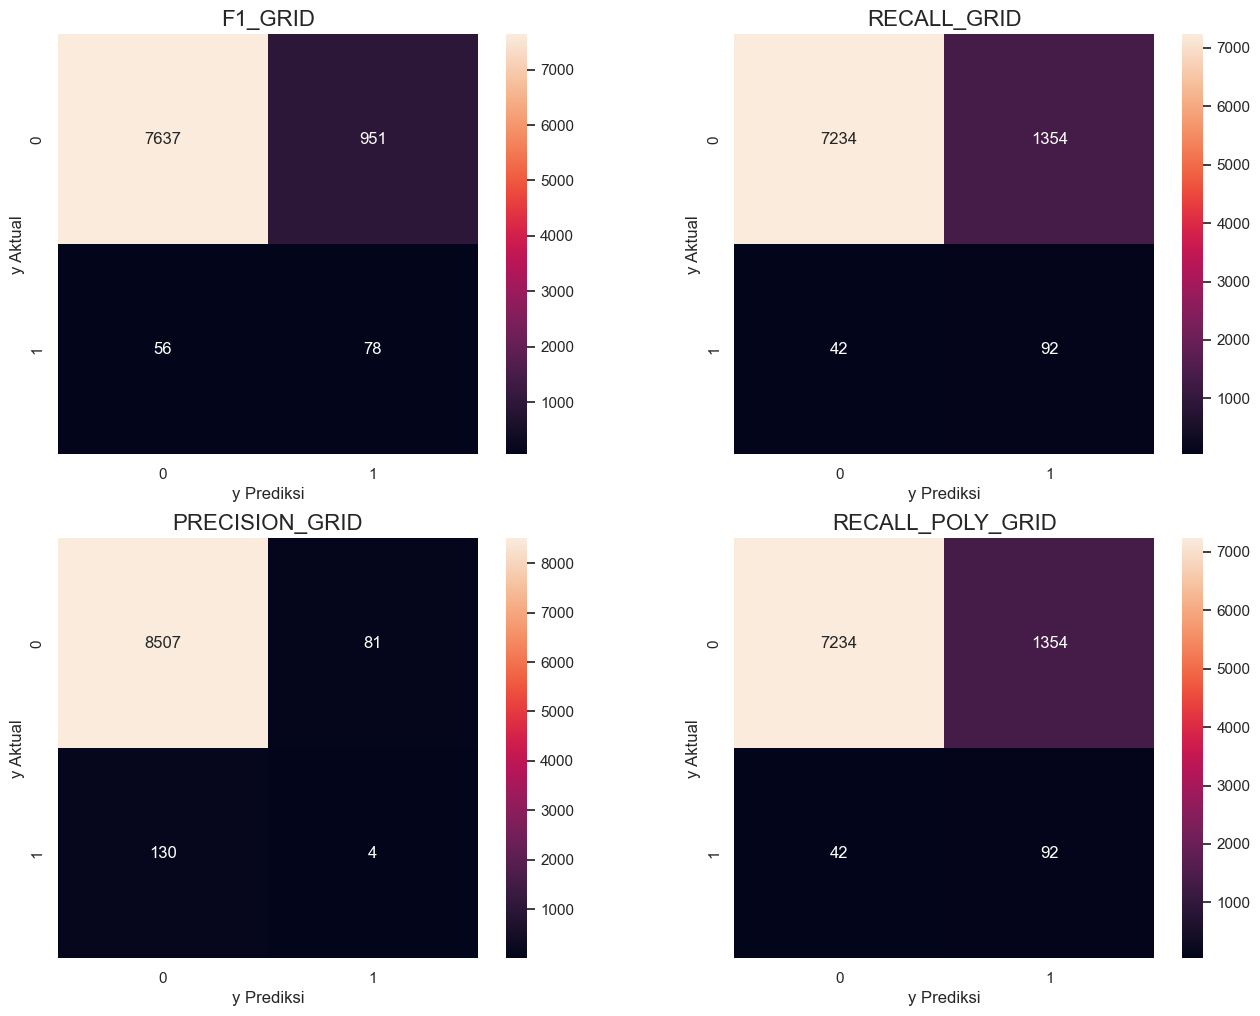

In [267]:
list_matrix = [matrix_f1 , matrix_recall , matrix_precision , matrix_poly]
list_title = [ 'F1_GRID' , 'RECALL_GRID' , 'PRECISION_GRID' , 'RECALL_POLY_GRID']

# Model XGBoost after tuning
plt.figure(figsize=(16,12))

subplot = 1

for matrix in list_matrix:
    
    plt.subplot(2,2,subplot)
    sns.heatmap(matrix, annot=True, fmt='.0f', square=True)
    plt.xlabel('y Prediksi')
    plt.ylabel('y Aktual')
    plt.title(list_title[subplot-1], size=16)

    subplot +=1
      
  
        

           
               

Perbandingan tuning tiap model berdasarkan tipe" scoring yang dicoba :

In [316]:
list_scoring = ['f1_score_tuning' ,' recall_tuning ', 'precision_tuning' , 'recall_poly_tuning']

f1_score_tuning = f1_score(y_test,y_pred_p)
recall_tuning = recall_score(y_test,y_pred_grid_recall)
precision_tuning = precision_score(y_test,y_pred_grid_precision)
recall_poly_tuning = recall_score(y_test,y_pred_grid_poly)
print('Score F1:' , f1_score_tuning)
print('Score Recall:' , recall_tuning)
print('Score Precision :' , precision_tuning)
print('Recall dengan Polynomial:' , recall_poly_tuning)


Score F1: 0.13413585554600174
Score Recall: 0.8731343283582089
Score Precision : 0.047058823529411764
Recall dengan Polynomial: 0.6865671641791045


# Conclusion & Recommendation:
berdasarkan dari hasil scoring after tuning , recall menjadi yang tertinggi , tetapi saya tetap menggunakan precision , untuk perbandingan Recall tanpa polynomial & Precision:

# PRECISION 
Kalkulasi tanpa Machine Learning :
- Total Biaya : 8588 + 134 = $8722 * $41 = $357.602
- Profit pada perusahaan : 8588 * $41 = $352.108
- Kerugian pada perusahaan : 134 * $41 = $5.494

Kalkukasi dengan Machine Learning : 

- Profit perusahaan : (8507 + 130) * $41 = $348.787
- Kerugian Perusahaan : 130 * $41 = $5.330
- Net Profit : $348.787 - $5.330 = $343.457
- Total pendapatan yang bisa didapatkan , tetapi gagal didapatkan dikarenakan Fail approach pada Customer(ML salah predict) : 81 * $41 =$3.321
- Total kerugian yg tidak terjadi ,dikarenakan prediksi machine learning yang benar : 4 * $41 =$164

# Recall : 
Kalkulasi tanpa Machine Learning :
- Total Biaya : 8588 + 134 = $8722 * $41 = $357.602
- Profit pada perusahaan : 8588 * $41 = $352.108
- Kerugian pada perusahaan : 134 * $41 = $5.494

Kalkukasi dengan Machine Learning : 

- Profit perusahaan : (362 + 17) * $41 = $15.539
- Kerugian Perusahaan : 17 * $41 = $697
- Net Profit : $15.539 - $697 = $14.842
- Total Pendapatan yang gagal dikarenakan gagal approach pada customer(ML salah predict): 8226 * $41 =$337.266
- Total kerugian yg tidak terjadi ,dikarenakan prediksi machine learning yang benar : 117 * $41 =$4.797

berdasarkan semua hasil test , secara langsung kita dapat menyimpulkan Matrix (Precision) lebih baik . 
alasanya dapat diliat dari perbandingan ''Total pendapatan yang bisa didapatkan , tetapi gagal didapatkan dikarenakan Fail approach pada Customer'' pada Precision lebih rendah , walaupun pada dasarnya akurasi recall lebih baik , tetapi precision lebih menguntungkan perusahaan berdasarkan hitungan tsb.



# Goals :
Maka berdasarkan pada permasalahan tersebut,Perusahaan ingin mempunyai kemampuan untuk memprediksi calon nasabah yang akan claim / tidak claim . yang nantinya hasil dari machine learning ini bisa membantu perusahaan untuk mengambil keputusan terhadap calon nasabah. 







Perbandingan hasil terbaik dari tiap scoring .